In [49]:
# import Serial libraries
import time
import numpy as np
import matplotlib.pyplot as plt
from cartpole_lib_python import *
# import odrive

In [89]:
init_odrive()
init_odrive()

axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
odrive initialized
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
odrive initialized


In [215]:
control_frequency = 100 # Hz
control_period = 1/control_frequency
T = 15 # seconds
N = int(T*control_frequency) # number of control steps
print("N: ", N)

states = np.zeros((N,4)) # initialize data array
controls = np.zeros((N,1)).astype(float) # initialize control array
control_input = np.zeros((N,2)).astype(float) # just for latency testing/debugging 
loop_time = []

elapsed_count = 0

# k_matrix = np.array([0,  .58,  .6855,  .383])
# k_matrix = np.array([2.91777, 43.1573, 5.11975, 16.049])
k_mult = 25

# k_matrix = np.array([30, 0, 0, 0]) / k_mult
k_matrix = np.array([0, 200, 10, 1]) / k_mult
control_clamp = 0.1
mid_point = 17.156545454545455
down = 4.712388980384691

busy_sleep(1, loop_start = time.time())

# xg = np.array([mid_point, np.pi/2, 0, 0])
xg = np.array([mid_point, down-np.pi, 0, 0])
xg = np.array([mid_point, 1.5603243512829312, 0, 0])

prev_x_vel = 0
prev_theta_vel = 0 
first = True

control_lpf = 0

for i in range(N):
    # read the encoder data
    # save the encoder data
    # write a 0 torque command
    # wait for the next control period

    time_start = time.time()

    state = get_state()
    states[i,:] = state

    control = -k_matrix @ (states[i,:] - xg).T

    mult_control = 1
    control = (mult_control * control) + ((1-mult_control) * control_lpf)
    control_lpf = control
    
    controls[i] = control

    if control > control_clamp:
        control = control_clamp
    elif control < -control_clamp:
        control = -control_clamp
    
    # control = 0
    
    command_linear_torque(control)

    elapsed_count += 1
    # loop_time.append(time.time() - time_start)
    time_sleep = control_period - (time.time() - time_start)
    if time_sleep < 0:
        time_sleep = 0
    time.sleep(time_sleep)
    # busy_sleep(control_period, loop_start = time_start)

command_linear_torque(0)

N:  1500


In [212]:
command_linear_torque(0)


In [209]:
print(get_state())



[17.665619834710743, 1.5603243512829312, 0.0012621665924998846, 0.05643850083920137]


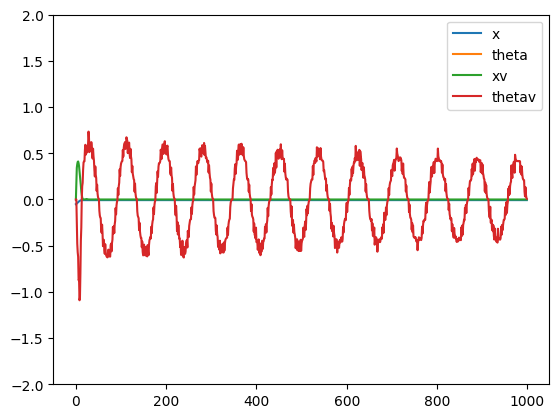

In [115]:
vels = np.zeros(N)
vels[0] = 0
for i in range(1,N):
    vels[i] = (states[i,1] - states[i-1,1]) / control_period
    
plt.plot(states-xg, label = "error")
#plt.plot(controls)
# plt.plot(vels)
plt.ylim([-2,2])
# plt.ylim([-1,1])
plt.legend(['x', 'theta', 'xv', 'thetav'])

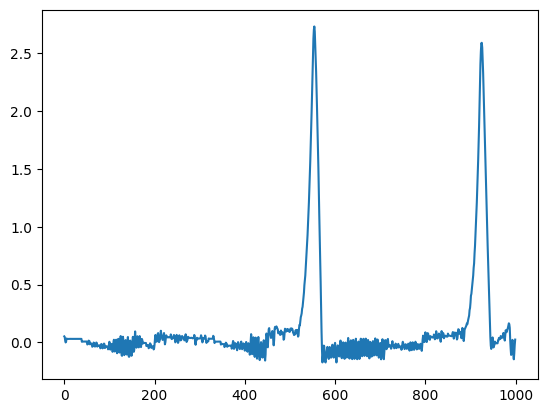

In [120]:
plt.plot(controls, label = "control")
# plt.ylim([-control_clamp, control_clamp])

In [21]:
ordv0 = get_odrive()

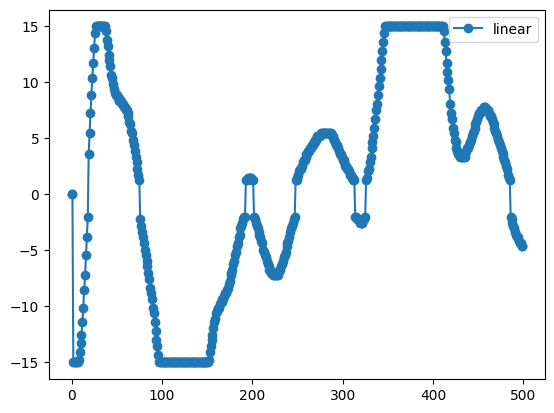

In [ ]:
# plot the data
# plt.plot(data[:,0], label = "linear")
# plt.plot(data[:,1], label = "shoulder")
# plt.plot(data[:,2], label = "elbow")
plt.plot(control_input[:,0] * 10, label = "linear", marker = "o") 
plt.legend()

plt.show()

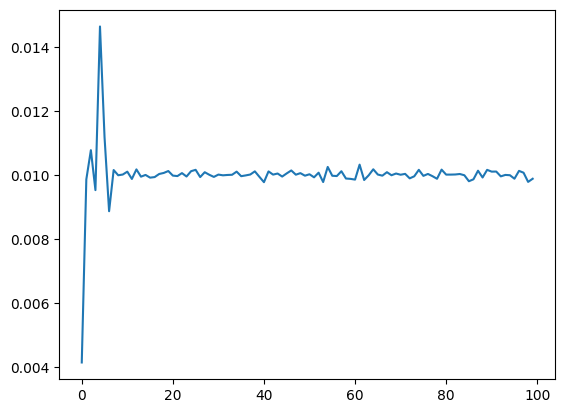

In [23]:
loop_time = np.array(loop_time)
plt.plot(loop_time)